In [1]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Naomi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


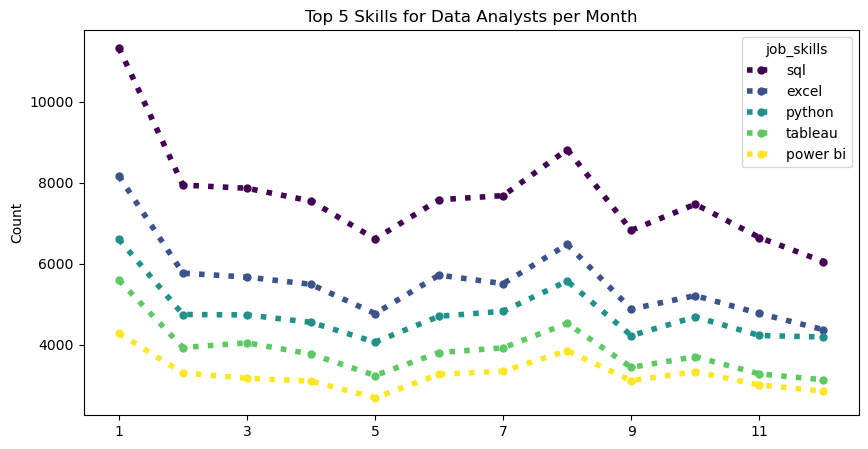

In [12]:
# Top 5 Skills for Data Analysts per Month

df_DA = df[df['job_title_short']=='Data Analyst'].copy()
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month
df_DA_explode=df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_pivot.loc['Total']=df_DA_pivot.sum()

df_DA_pivot= df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot= df_DA_pivot.drop('Total')

df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth='4',  
    linestyle=':', #shapes on the line
    colormap='viridis', #choose the color
    marker='o',  #symbol on the dots
    markersize=5,
    figsize=(10,5)
)
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [ ]:
from adjustText import adjust_text 

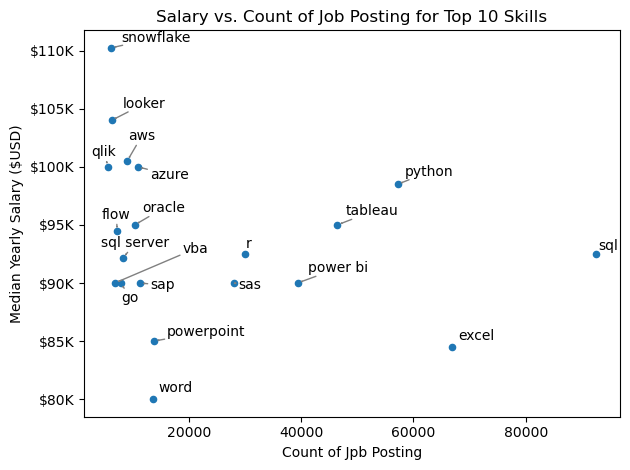

In [26]:
# Calculate Count job / Median salary by skills for Data Analyst

df_DA= df[df['job_title_short']=='Data Analyst'].copy()
df_DA = df_DA.explode('job_skills')
df_DA_skills = df_DA.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
    )

df_DA_skills= df_DA_skills.sort_values(by='skill_count',ascending=False).head(20)


df_DA_skills.plot(kind='scatter',x='skill_count',y='median_salary')
texts=[]
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_count'].iloc[i],df_DA_skills['median_salary'].iloc[i],txt))

adjust_text(texts,expand=(1.2, 2), # expand text bounding boxes by 1.2 fold in x direction and 2 fold in y direction
            arrowprops=dict(arrowstyle='->', color='gray') # ensure the labeling is clear by adding arrows
            )
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))   #Formatear los valores de axis Y : $110 K

plt.xlabel('Count of Jpb Posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Posting for Top 10 Skills')
plt.tight_layout()
plt.show()

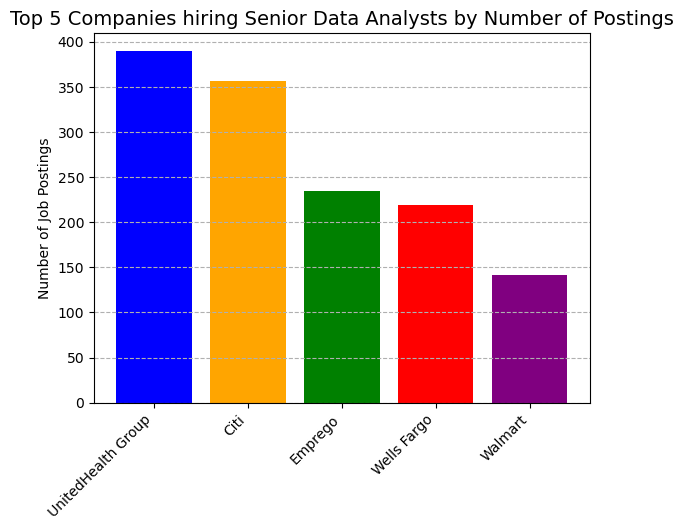

In [29]:
# Filter for Senior Data Analyst roles
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# Get the top 5 companies by number of postings
location_counts = SDA_df['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart
plt.bar(location_counts.index, location_counts.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()